<a href="https://colab.research.google.com/github/she1031/TimeSeriesPrediction/blob/main/Time_Series_Predictive_Model_and_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# VIX - KALBE

In [1]:
import pandas as pd

In [2]:
!git clone https://github.com/she1031/TimeSeriesPrediction.git

file_path1 = '/content/TimeSeriesPrediction/Case Study - Customer.csv'
file_path2 = '/content/TimeSeriesPrediction/Case Study - Product.csv'
file_path3 = '/content/TimeSeriesPrediction/Case Study - Store.csv'
file_path4 = '/content/TimeSeriesPrediction/Case Study - Transaction.csv'

customer = pd.read_csv(file_path1, delimiter = ';')
product = pd.read_csv(file_path2, delimiter = ';')
store = pd.read_csv(file_path3, delimiter = ';')
transaction = pd.read_csv(file_path4, delimiter = ';')

Cloning into 'TimeSeriesPrediction'...
remote: Enumerating objects: 6, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 6 (delta 0), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (6/6), 52.88 KiB | 6.61 MiB/s, done.


In [3]:
customer.head()

,CustomerID,Age,Gender,Marital Status,Income
0,1,55,1,Married,"5,12"
1,2,60,1,Married,"6,23"
2,3,32,1,Married,"9,17"
3,4,31,1,Married,"4,87"
4,5,58,1,Married,"3,57"


In [4]:
product.head()

,ProductID,Product Name,Price
0,P1,Choco Bar,8800
1,P2,Ginger Candy,3200
2,P3,Crackers,7500
3,P4,Potato Chip,12000
4,P5,Thai Tea,4200


In [5]:
store.head()

,StoreID,StoreName,GroupStore,Type,Latitude,Longitude
0,1,Prima Tendean,Prima,Modern Trade,"-6,2","106,816666"
1,2,Prima Kelapa Dua,Prima,Modern Trade,"-6,914864","107,608238"
2,3,Prima Kota,Prima,Modern Trade,"-7,797068","110,370529"
3,4,Gita Ginara,Gita,General Trade,"-6,966667","110,416664"
4,5,Bonafid,Gita,General Trade,"-7,250445","112,768845"


In [6]:
transaction.head()

,TransactionID,CustomerID,Date,ProductID,Price,Qty,TotalAmount,StoreID
0,TR11369,328,01/01/2022,P3,7500,4,30000,12
1,TR16356,165,01/01/2022,P9,10000,7,70000,1
2,TR1984,183,01/01/2022,P1,8800,4,35200,4
3,TR35256,160,01/01/2022,P1,8800,7,61600,4
4,TR41231,386,01/01/2022,P9,10000,1,10000,4


# Time Series Prediction

## Data Cleansing

### Customer dataset

In [7]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 447 entries, 0 to 446
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   CustomerID      447 non-null    int64 
 1   Age             447 non-null    int64 
 2   Gender          447 non-null    int64 
 3   Marital Status  444 non-null    object
 4   Income          447 non-null    object
dtypes: int64(3), object(2)
memory usage: 17.6+ KB


In [8]:
customer['Income']

0       5,12
1       6,23
2       9,17
3       4,87
4       3,57
       ...  
442     9,28
443    15,31
444    14,48
445     7,81
446    20,37
Name: Income, Length: 447, dtype: object

In [9]:
customer['Income'] = customer['Income'].replace('[,]','.', regex = True).astype('float')

### Product dataset

In [10]:
# No data cleansing required
product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   ProductID     10 non-null     object
 1   Product Name  10 non-null     object
 2   Price         10 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 368.0+ bytes


### Store dataset

In [11]:
store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   StoreID     14 non-null     int64 
 1   StoreName   14 non-null     object
 2   GroupStore  14 non-null     object
 3   Type        14 non-null     object
 4   Latitude    14 non-null     object
 5   Longitude   14 non-null     object
dtypes: int64(1), object(5)
memory usage: 800.0+ bytes


In [12]:
store[['Latitude', 'Longitude']]

,Latitude,Longitude
0,"-6,2","106,816666"
1,"-6,914864","107,608238"
2,"-7,797068","110,370529"
3,"-6,966667","110,416664"
4,"-7,250445","112,768845"
5,"-5,135399","119,42379"
6,"3,316694","114,590111"
7,"5,54829","95,323753"
8,"-3,654703","128,190643"
9,"3,597031","98,678513"


In [13]:
store['Latitude'] = store['Latitude'].replace('[,]','.', regex = True).astype('float')
store['Longitude'] = store['Longitude'].replace('[,]','.', regex = True).astype('float')

### Transaction dataset

In [14]:
transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5020 entries, 0 to 5019
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TransactionID  5020 non-null   object
 1   CustomerID     5020 non-null   int64 
 2   Date           5020 non-null   object
 3   ProductID      5020 non-null   object
 4   Price          5020 non-null   int64 
 5   Qty            5020 non-null   int64 
 6   TotalAmount    5020 non-null   int64 
 7   StoreID        5020 non-null   int64 
dtypes: int64(5), object(3)
memory usage: 313.9+ KB


In [15]:
transaction['Date'] = pd.to_datetime(transaction['Date'])

<ipython-input-15-d6e1eccc728f>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  transaction['Date'] = pd.to_datetime(transaction['Date'])


## Merge Data

In [16]:
df = pd.merge(transaction, customer, on = ['CustomerID'])
df.head()

,TransactionID,CustomerID,Date,ProductID,Price,Qty,TotalAmount,StoreID,Age,Gender,Marital Status,Income
0,TR11369,328,2022-01-01,P3,7500,4,30000,12,36,0,Married,10.53
1,TR67395,328,2022-01-22,P8,16000,3,48000,11,36,0,Married,10.53
2,TR89012,328,2022-03-25,P5,4200,5,21000,6,36,0,Married,10.53
3,TR97172,328,2022-05-21,P1,8800,5,44000,1,36,0,Married,10.53
4,TR57013,328,2022-09-15,P7,9400,6,56400,1,36,0,Married,10.53


In [17]:
df = pd.merge(df, product.drop(columns = ['Price']), on = ['ProductID'])
df.head()

,TransactionID,CustomerID,Date,ProductID,Price,Qty,TotalAmount,StoreID,Age,Gender,Marital Status,Income,Product Name
0,TR11369,328,2022-01-01,P3,7500,4,30000,12,36,0,Married,10.53,Crackers
1,TR20170,165,2022-07-23,P3,7500,2,15000,13,44,1,Married,14.58,Crackers
2,TR80016,183,2022-01-24,P3,7500,2,15000,10,27,1,Single,0.18,Crackers
3,TR89318,183,2022-07-17,P3,7500,1,7500,12,27,1,Single,0.18,Crackers
4,TR82094,183,2022-09-15,P3,7500,2,15000,1,27,1,Single,0.18,Crackers


In [18]:
df = pd.merge(df, store, on = ['StoreID'])
df.head()

,TransactionID,CustomerID,Date,ProductID,Price,Qty,TotalAmount,StoreID,Age,Gender,Marital Status,Income,Product Name,StoreName,GroupStore,Type,Latitude,Longitude
0,TR11369,328,2022-01-01,P3,7500,4,30000,12,36,0,Married,10.53,Crackers,Prestasi Utama,Prestasi,General Trade,-2.990934,104.756554
1,TR89318,183,2022-07-17,P3,7500,1,7500,12,27,1,Single,0.18,Crackers,Prestasi Utama,Prestasi,General Trade,-2.990934,104.756554
2,TR9106,123,2022-09-26,P3,7500,4,30000,12,34,0,Married,4.36,Crackers,Prestasi Utama,Prestasi,General Trade,-2.990934,104.756554
3,TR4331,335,2022-08-01,P3,7500,3,22500,12,29,1,Single,4.74,Crackers,Prestasi Utama,Prestasi,General Trade,-2.990934,104.756554
4,TR6445,181,2022-10-01,P3,7500,4,30000,12,33,1,Married,9.94,Crackers,Prestasi Utama,Prestasi,General Trade,-2.990934,104.756554


### Regression

In [19]:
#groupby data and aggregate sum of the qty

df_reg = df.groupby('Date').agg({'Qty': 'sum'}).reset_index()
df_reg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    365 non-null    datetime64[ns]
 1   Qty     365 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 5.8 KB


In [20]:
df_reg.set_index('Date', inplace=True)

## Data Exploration

In [21]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [22]:
result = seasonal_decompose(df_reg['Qty'], model='additive', period=12)

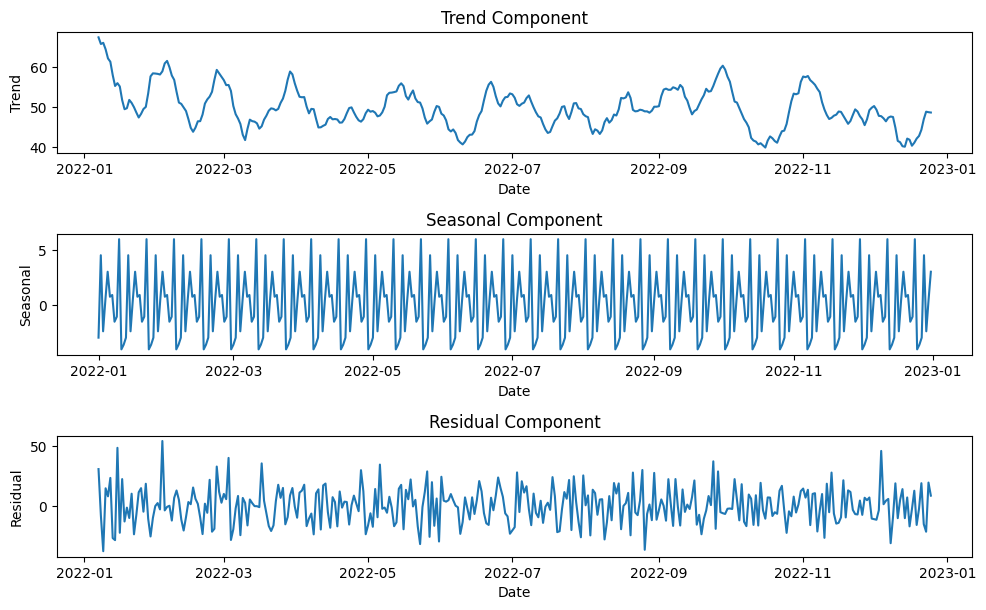

In [23]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8))

# Trend component
plt.subplot(4, 1, 2)
plt.plot(result.trend)
plt.title('Trend Component')
plt.xlabel('Date')
plt.ylabel('Trend')

# Seasonal component
plt.subplot(4, 1, 3)
plt.plot(result.seasonal)
plt.title('Seasonal Component')
plt.xlabel('Date')
plt.ylabel('Seasonal')

# Residual component
plt.subplot(4, 1, 4)
plt.plot(result.resid)
plt.title('Residual Component')
plt.xlabel('Date')
plt.ylabel('Residual')

plt.tight_layout()
plt.show()


## Split Data

In [24]:
# 80% for training, 20% for testing
train_size = int(0.9 * len(df_reg))

# Training and Testing sets
df_train, df_test = df_reg.iloc[:train_size], df_reg.iloc[train_size:]

# Verify the split
print("Training data:")
print(df_train)
print("\nTesting data:")
print(df_test)

Training data:
            Qty
Date           
2022-01-01   49
2022-01-02   50
2022-01-03   76
2022-01-04   98
2022-01-05   67
...         ...
2022-11-20   55
2022-11-21   55
2022-11-22   49
2022-11-23   40
2022-11-24   42

[328 rows x 1 columns]

Testing data:
            Qty
Date           
2022-11-25   55
2022-11-26   40
2022-11-27   53
2022-11-28   50
2022-11-29   55
2022-11-30   45
2022-12-01   35
2022-12-02   34
2022-12-03   41
2022-12-04   98
2022-12-05   46
2022-12-06   51
2022-12-07   56
2022-12-08   17
2022-12-09   39
2022-12-10   62
2022-12-11   30
2022-12-12   52
2022-12-13   50
2022-12-14   26
2022-12-15   46
2022-12-16   29
2022-12-17   35
2022-12-18   54
2022-12-19   29
2022-12-20   41
2022-12-21   64
2022-12-22   30
2022-12-23   26
2022-12-24   74
2022-12-25   53
2022-12-26   39
2022-12-27   70
2022-12-28   68
2022-12-29   42
2022-12-30   44
2022-12-31   37


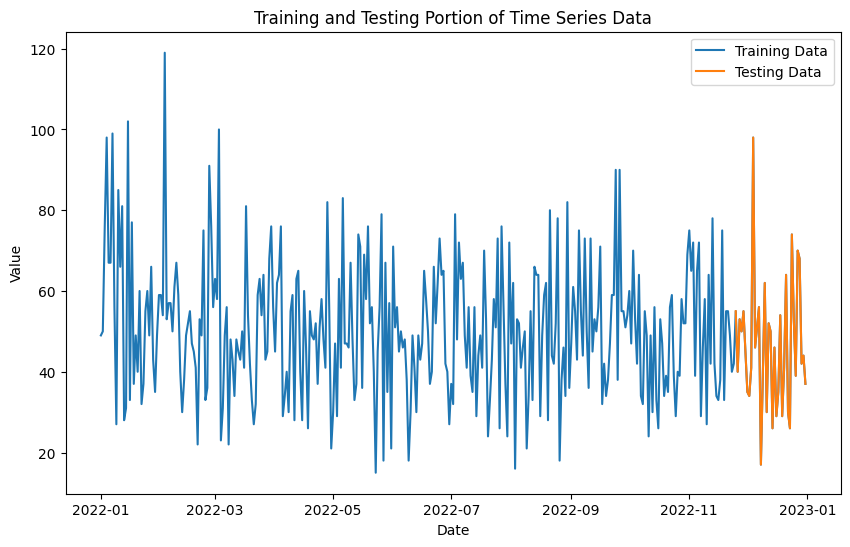

In [25]:
plt.figure(figsize=(10, 6))
plt.plot(df_reg.index, df_reg['Qty'], label='Training Data')
plt.plot(df_test.index, df_test['Qty'], label='Testing Data')

plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Training and Testing Portion of Time Series Data')
plt.legend()
plt.show()

## Modeling

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using

Root Mean Squared Error (RMSE): 16.35983879794038


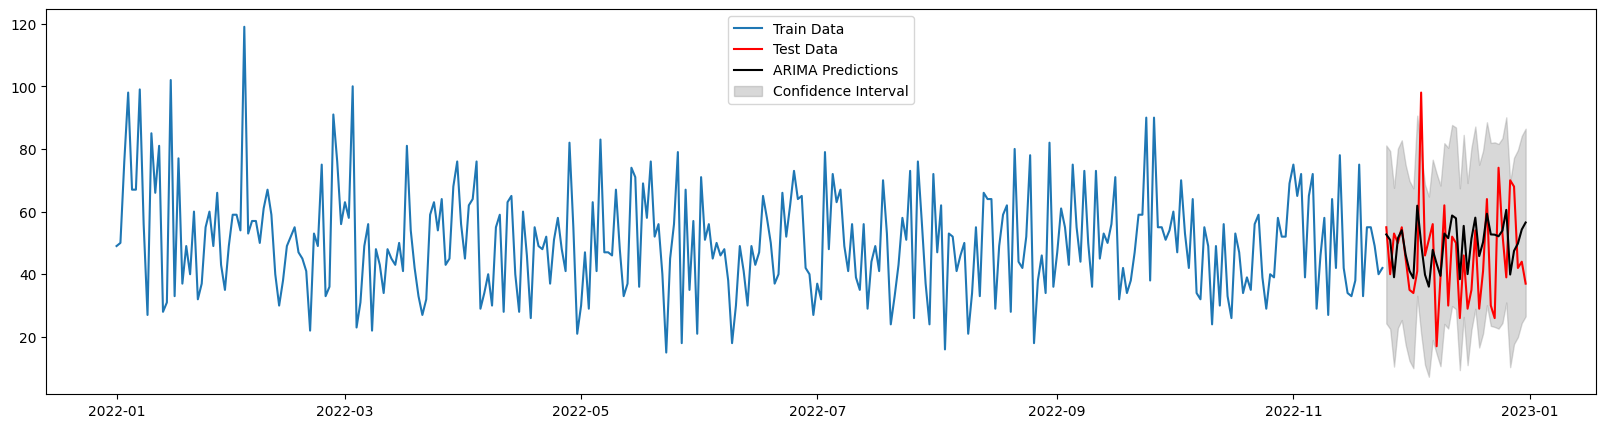

In [39]:
# ARIMA

import statsmodels.api as sm
import numpy as np

y = df_train['Qty']

# Fit ARIMA model
p, d, q = 80, 1, 2  # Replace these values with the identified order (p, d, q)
model = sm.tsa.arima.ARIMA(df_train, order=(p, d, q))
arima_model = model.fit()

y_pred = arima_model.get_forecast(len(df_test))

# Forecast using ARIMA model
y_pred_df = y_pred.conf_int()
y_pred_df['predictions'] = arima_model.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_df.index = df_test.index
y_pred_out = y_pred_df['predictions']

y_true =df_test['Qty']
rmse = np.sqrt(np.mean((y_true - y_pred_out) ** 2))
print("Root Mean Squared Error (RMSE):", rmse)

plt.figure(figsize=(20, 5))
plt.plot(df_train['Qty'], label='Train Data')
plt.plot(df_test['Qty'], color='red', label='Test Data')
plt.plot(y_pred_out, color='black', label='ARIMA Predictions')
plt.fill_between(y_pred_df.index, y_pred_df['lower Qty'], y_pred_df['upper Qty'], color='gray', alpha=0.3, label='Confidence Interval')
plt.legend()
plt.show()


#https://www.machinelearningplus.com/time-series/arima-model-time-series-forecasting-python/

# Machine Learning Clustering

In [27]:
df_clust = df.groupby(['CustomerID']).agg({'TransactionID' : 'count',
                                           'Qty' : 'sum',
                                           'TotalAmount' : 'sum'}).reset_index()

df_clust.drop(columns = ['CustomerID']).head()

,TransactionID,Qty,TotalAmount
0,17,60,623300
1,13,57,392300
2,15,56,446200
3,10,46,302500
4,7,27,268600


In [28]:
from sklearn import preprocessing

data_clust_normalize = preprocessing.normalize(df_clust)

## Modeling

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

<Axes: >

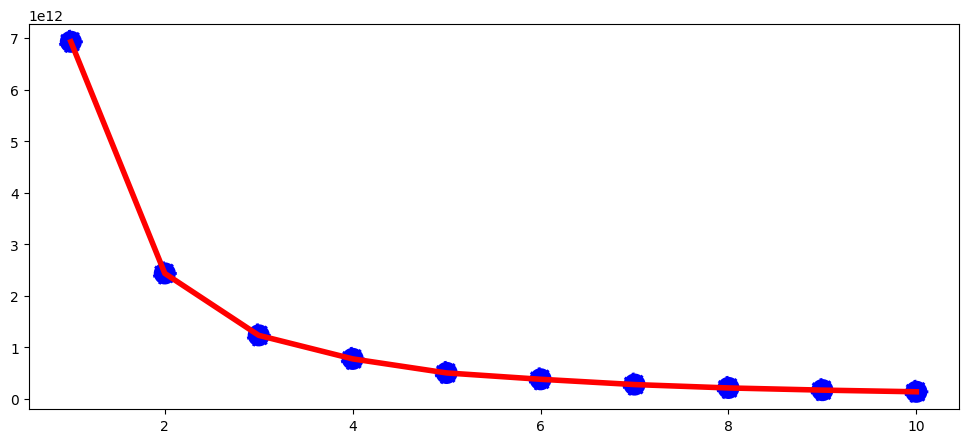

In [29]:
from sklearn.cluster import KMeans
import seaborn as sns

# list nilai inersia
inertias = []

# k range yang akan diuji
k_range = range(1, 11)

# hitung inersia untuk setiap nilai k
for k in k_range:
  model = KMeans(n_clusters = k, random_state = 0)
  model.fit(df_clust)
  inertias.append(model.inertia_)

plt.figure(figsize=(12, 5))

sns.lineplot(x=range(1, 11), y=inertias, color='red', linewidth = 4)
sns.scatterplot(x=range(1, 11), y=inertias, s=300, color='blue',  linestyle='--')

## Visualization

In [30]:
kmeans = KMeans(n_clusters = 4, random_state = 30)
kmeans.fit(df_clust)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4, random_state=30)

In [31]:
df_clust['cluster'] = kmeans.labels_
df_clust.head()

,CustomerID,TransactionID,Qty,TotalAmount,cluster
0,1,17,60,623300,3
1,2,13,57,392300,0
2,3,15,56,446200,0
3,4,10,46,302500,1
4,5,7,27,268600,1


In [32]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

pca.fit(df_clust)
pcs = pca.transform(df_clust)

In [33]:
data_pca = pd.DataFrame(data = pcs, columns = ['PC 1', 'PC 2'])
data_pca['cluster'] = df_clust['cluster']
data_pca.head()

,PC 1,PC 2,cluster
0,260787.719425,-194.304680,3
1,29787.721388,-218.706410,0
2,83687.720661,-211.781214,0
3,-60012.278966,-226.592000,1
4,-93912.280537,-229.342031,1


<Axes: xlabel='PC 1', ylabel='PC 2'>

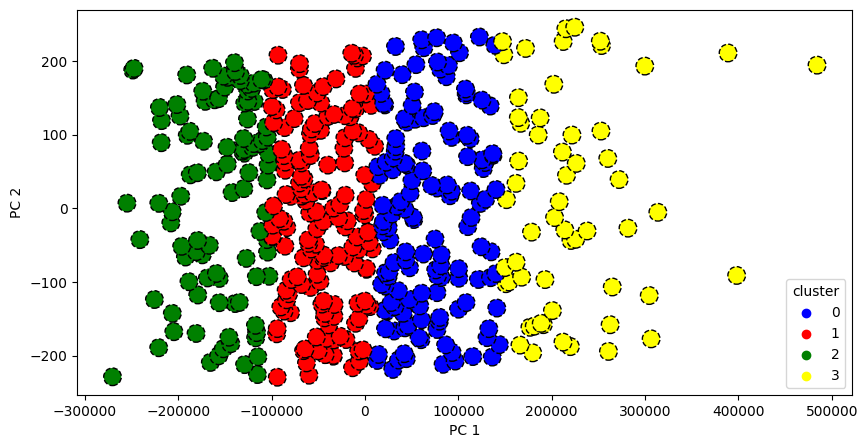

In [34]:
fig, ax = plt.subplots(figsize=(10,5))

sns.scatterplot(
    x="PC 1", y="PC 2",
    hue="cluster",
    edgecolor='black',
    linestyle='--',
    data=data_pca,
    palette=['blue','red','green','yellow'],
    s=160,
    ax=ax
)

In [35]:
aggregation_functions = {
    'CustomerID': 'count',
    'TransactionID': 'mean',
    'Qty': 'mean',
    'TotalAmount': 'mean'}

df_clust.groupby('cluster').agg(aggregation_functions)

,CustomerID,TransactionID,Qty,TotalAmount
cluster,,,,
0,140,12.871429,47.521429,431575.000000
1,152,10.414474,37.263158,316792.763158
2,98,7.448980,25.867347,206380.612245
3,57,15.877193,60.421053,583240.350877
